In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

import seaborn as sns
import warnings

In [34]:
X, Y = make_circles(n_samples=200, noise =0.1, factor= 0.0002)
colors = ['#FFB300' if e==1 else '#E64A19' for e in Y]

In [37]:
X[0]

array([0.18736312, 0.98412799])

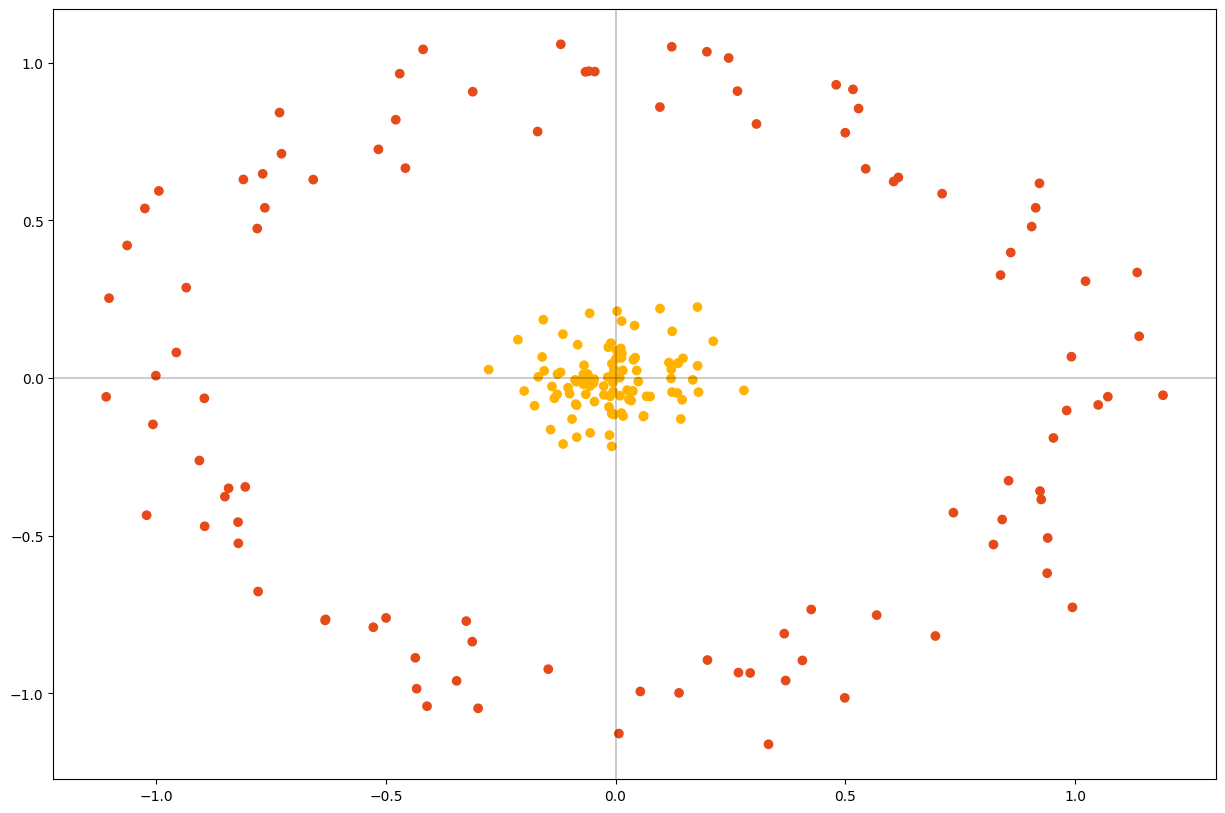

In [3]:
#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,10))
plt.axhline(c = 'black', alpha = 0.2)
plt.axvline(c = 'black', alpha = 0.2)
plt.scatter(X[:,0], X[:,1], c = colors)
plt.grid(False)
plt.show()

In [4]:
class kernel:
    
    def __init__(self, gamma = 1):
        self.gamma = gamma
    
    def rbf(self, x, y):
        return np.exp(- self.gamma * (np.linalg.norm(x-y)**2))

In [27]:
class KPCA:
    def __init__(self, X, kernel, d):
        self.X = X
        self.kernel = kernel 
        self.d = d
    
    def _is_pos_semidef(self, x):
        return np.all(x >= 0)

    def __kernel_matrix(self):
        K = []
        r, c = self.X.shape
        for fil in range(c):
            k_aux = []
            for col in range(c):
                k_aux.append(self.kernel(self.X[:, fil], self.X[:, col]))
            K.append(k_aux)
        K = np.array(K)
        # Centering K
        ones = np.ones(K.shape)/c
        K = K - ones@K - K@ones + ones@K@ones
        return K
    
    def __descomp(self):
        self.K = self.__kernel_matrix()
        eigval, eigvec = np.linalg.eig(self.K)
        if not self._is_pos_semidef(eigval):
            warnings.warn("La matriz K no es semidefinida positiva")
        # Normalize eigenvectors and compute singular values of K
        tuplas_eig = [(np.sqrt(eigval[i]), eigvec[:,i]/np.sqrt(eigval[i]) ) for i in range(len(eigval))]
        tuplas_eig.sort(key=lambda x: x[0], reverse=True)
        return tuplas_eig
    
    def project(self):
        self.tuplas_eig = self.__descomp()
        tuplas_eig_dim = self.tuplas_eig[:self.d]
        self.sigma = np.diag([i[0] for i in tuplas_eig_dim])
        self.v = np.array([list(j[1]) for j in tuplas_eig_dim]).T
        self.sigma = np.real_if_close(self.sigma, tol=1)
        self.v = np.real_if_close(self.v, tol=1)
        self.scores = self.sigma @ self.v.T
        return self.scores
    
    def plot_singular_values(self, grid = True):
        eig_plot = [np.real_if_close(e, tol=1) for (e, _) in self.tuplas_eig if e > 0.01]
        #plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(15,7.5))
        plt.plot(list(range(1, len(eig_plot) + 1)), eig_plot)
        plt.grid(grid)
        plt.title('Valores singulares de la matriz $K$ distintos de 0')
        plt.ylabel('$sigma^2$')
        plt.show()
        
    def plot_scores_2d(self, colors, grid = True, dim_1 = 1, dim_2 = 2):
        if self.d < 2:
            warnings.warn("No hay suficientes componentes prinicpales")
            return
        
        #plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(15,10))
        plt.axhline(c = 'black', alpha = 0.2)
        plt.axvline(c = 'black', alpha = 0.2)
        plt.scatter(self.scores[dim_1 - 1,:], self.scores[dim_2 - 1,:], c = colors)
        plt.grid(grid)
        plt.title('KPCA Space')
        plt.xlabel('${}^a$ componente principal en el espacio $phi(X)$'.format(dim_1))
        plt.ylabel('${}^a$ componente principal en el espacio $phi(X)$'.format(dim_2))
        plt.show()
        
    def plot_scores_3d(self, colors, grid = True, dim_1 = 1, dim_2 = 2, dim_3 = 3):
        if self.d < 3:
            warnings.warn("No hay suficientes componentes prinicpales")
            return
        
        #plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(self.scores[dim_1 - 1,:], self.scores[dim_2 - 1,:], self.scores[dim_3 - 1,:], c = colors)
        plt.grid(grid)
        ax.axis('on')
        plt.title('KPCA Space')
        ax.set_xlabel('${}^a$ componente principal en el espacio $phi(X)$'.format(dim_1))
        ax.set_ylabel('${}^a$ componente principal en el espacio $phi(X)$'.format(dim_2))
        ax.set_zlabel('${}^a$ componente principal en el espacio $phi(X)$'.format(dim_3))
        plt.show()
        
    def plot_density(self, labels, dim=1, grid = False):
        #plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(15,5))
        for ele in np.unique(labels):
            sns.distplot(self.scores[dim - 1,:][np.where(labels == ele)], hist = False, 
                         kde = True, kde_kws = {'linewidth': 3}, label = ele)
        plt.grid(grid)
        plt.legend()
        plt.title('Distribuciones en la ${}^a$ componente principal'.format(dim))
        plt.show()

In [33]:
X

array([[ 9.05791378e-01, -7.84864523e-03, -8.80901050e-02,
         6.15605020e-01, -1.41430251e-01,  2.75042088e-03,
         1.41872441e-01,  4.25922042e-01,  1.78284357e-01,
        -5.26997913e-03,  1.19160444e+00,  1.38121535e-01,
        -7.80012857e-01, -1.00058483e+00,  1.98799754e-01,
         4.60025174e-02, -4.10360153e-01,  5.39250172e-02,
        -5.52840313e-02, -6.05068354e-02,  1.27588488e-02,
        -6.58023692e-01, -2.12516988e-01, -3.11947300e-01,
         4.13840620e-02, -1.32179721e-02,  5.16798795e-01,
         5.68381802e-01,  7.21817434e-03,  1.65572139e-02,
        -8.95091349e-01, -1.98926774e-01,  6.96160919e-01,
        -1.57259832e-01, -4.57409051e-01, -1.70582154e-02,
         2.79358361e-01,  1.37204807e-02,  3.70229648e-01,
         2.92579645e-02, -8.06015855e-01,  9.23915224e-01,
        -8.24901050e-02,  2.65370428e-01, -5.69999674e-03,
         8.22545516e-01,  4.99945649e-01, -1.59783990e-01,
        -8.17042710e-03, -3.24945356e-01, -5.80942319e-0

In [28]:
X = X.T # X must be dxn
k = kernel(gamma = 120).rbf
kpca = KPCA(X, k, 3)
scores = kpca.project()

In [29]:
T = kpca.scores #Matrix of scores
K = kpca.K #Kernel matrix
V = kpca.v #Matrix of eigenvectors
S = kpca.sigma #Diagonal matrix of (real) singular values

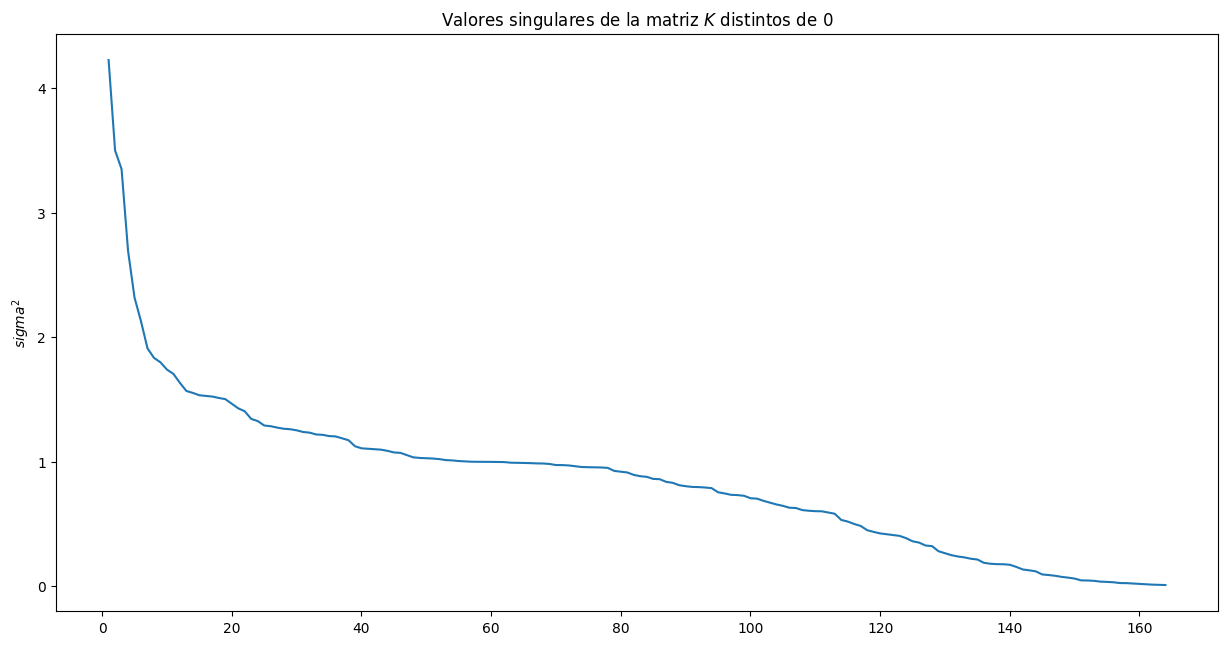

In [30]:
kpca.plot_singular_values(grid = False)


/tmp/ipykernel_19486/675176083.py:91: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.scores[dim - 1,:][np.where(labels == ele)], hist = False,
/tmp/ipykernel_19486/675176083.py:91: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.scores[dim - 1,:][np.where(labels == ele)]

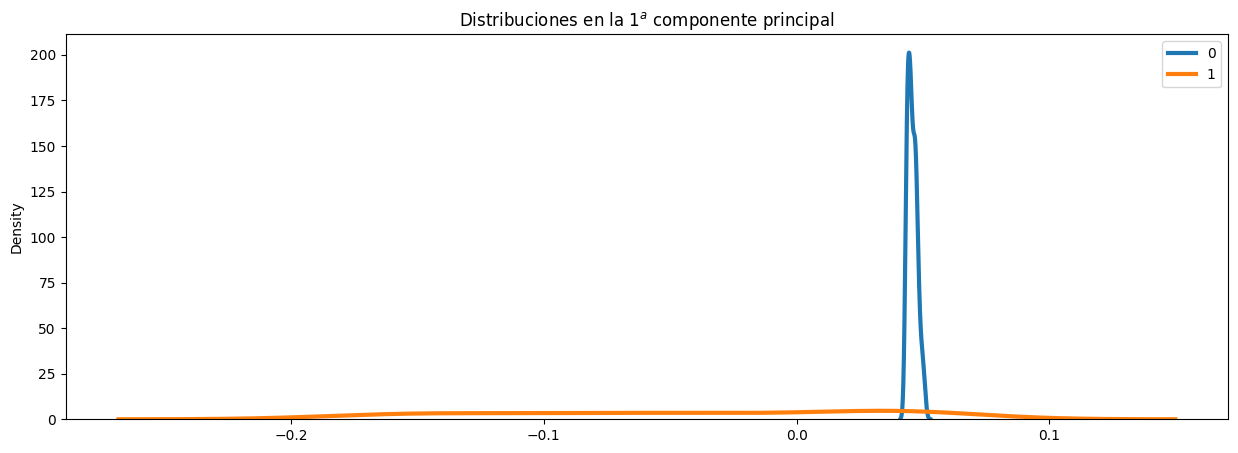

In [31]:
kpca.plot_density(labels = Y, dim=1, grid = False)


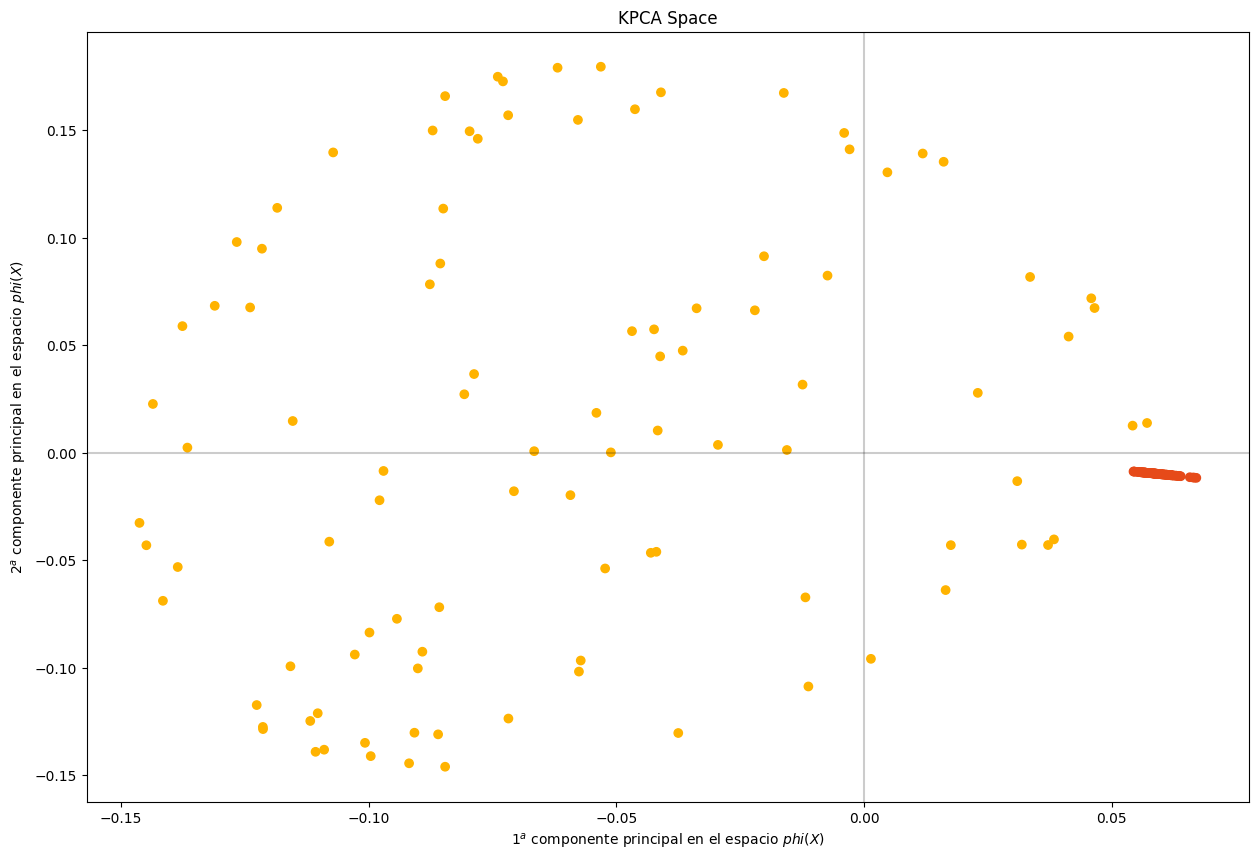

In [38]:
kpca.plot_scores_2d(colors = colors, grid = False, dim_1 = 1, dim_2 = 2)


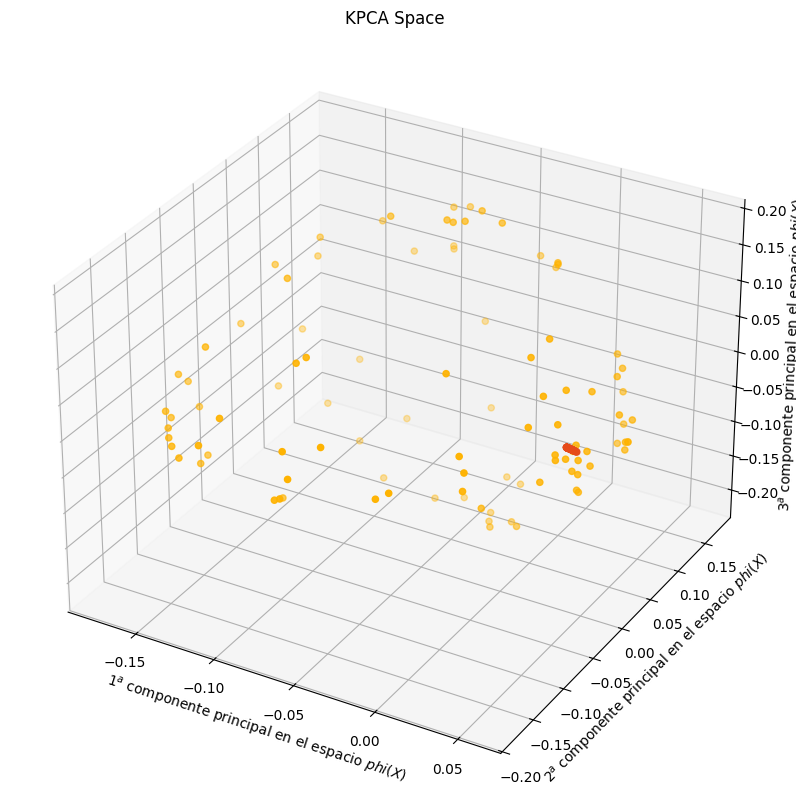

In [32]:
kpca.plot_scores_3d(colors = colors, dim_1 = 1, dim_2 = 2, dim_3 = 3)
